In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import itertools
import random

In [2]:
#FUNCTION FOR GENERALIZED BELL FUNCTION
def gbell_func(a, b, c):
    x = np.arange(-10, 10, 0.01)
    gbell_f = np.divide(1, 1 + np.power(np.divide(x - c, a), 2 * b))
    plt.plot(x, gbell_f,color = 'magenta')
    plt.title("Generalized Bell Function")
    plt.show()
    #print(x)

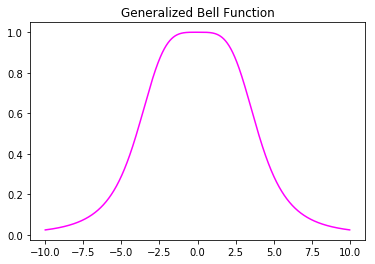

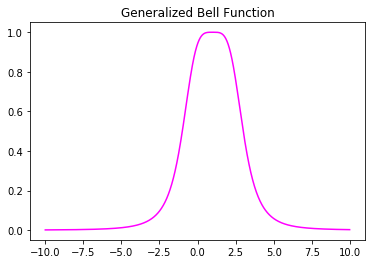

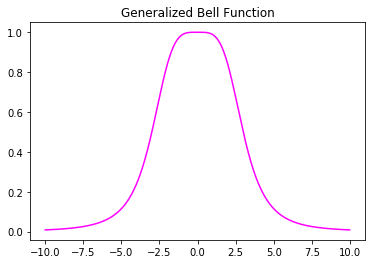

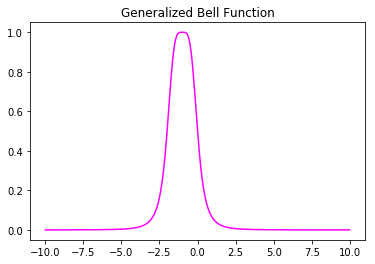

In [3]:
#EXAMPLES
gbell_func(4, 2, 0)
gbell_func(2, 2, 1)
gbell_func(3, 2, 0)
gbell_func(1, 2,-1)  #CAN GET ANY BELL FUNCTION FOR DIFFERENT VALUES OF a ,b, c 

In [4]:
#Reading the data
df = pd.read_csv('data.csv')
df.head()

,1,2,3,4,5,6,7
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


In [5]:
# Data into X & Y
X = df.iloc[:, 0:6].values
print (df.iloc[:, 0:6])
y = df.iloc[:, 6:7].values

       1      2     3     4     5      6
0   -2.3  0.568  4.78  3.99  3.17  0.125
1   -2.3  0.568  4.78  3.99  3.17  0.150
2   -2.3  0.568  4.78  3.99  3.17  0.175
3   -2.3  0.568  4.78  3.99  3.17  0.200
4   -2.3  0.568  4.78  3.99  3.17  0.225
5   -2.3  0.568  4.78  3.99  3.17  0.250
6   -2.3  0.568  4.78  3.99  3.17  0.275
7   -2.3  0.568  4.78  3.99  3.17  0.300
8   -2.3  0.568  4.78  3.99  3.17  0.325
9   -2.3  0.568  4.78  3.99  3.17  0.350
10  -2.3  0.568  4.78  3.99  3.17  0.375
11  -2.3  0.568  4.78  3.99  3.17  0.400
12  -2.3  0.568  4.78  3.99  3.17  0.425
13  -2.3  0.568  4.78  3.99  3.17  0.450
14  -2.3  0.569  4.78  3.04  3.64  0.125
15  -2.3  0.569  4.78  3.04  3.64  0.150
16  -2.3  0.569  4.78  3.04  3.64  0.175
17  -2.3  0.569  4.78  3.04  3.64  0.200
18  -2.3  0.569  4.78  3.04  3.64  0.225
19  -2.3  0.569  4.78  3.04  3.64  0.250
20  -2.3  0.569  4.78  3.04  3.64  0.275
21  -2.3  0.569  4.78  3.04  3.64  0.300
22  -2.3  0.569  4.78  3.04  3.64  0.325
23  -2.3  0.569 

In [6]:
print("Shape of X is {0}".format(np.shape(X)))
print("Shape of y is {0}".format(np.shape(y)))

Shape of X is (308, 6)
Shape of y is (308, 1)


In [7]:
#Normalizing the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_norm = scaler.fit_transform(X)
scaler1 = MinMaxScaler(feature_range=(0,1))
y_norm = scaler.fit_transform(y)

In [8]:
X = X_norm
y = y_norm

In [9]:
# Splitting the dataset into two sets, training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [10]:
#Enter No.of Membership Functions (say 3 ,4 )
total_memfunc = int(input("NO. OF MEMBERSHIP FUNCTIONS : "))

NO. OF MEMBERSHIP FUNCTIONS : 3


In [11]:
#BELL Function Formula
def bell_curve(x,a,b,c):
    return 1/(1+((x-c)/a)**(2*b))

In [13]:
# Depending upon the total number of membership functions, we'll divide the range into subspaces
# say if we've three membership functions we'll get three subspaces and each subspace will have a center, that we need to know
# let's create a function that will give us those centers of the subspaces
def give_centers(total_memfunc, min_range, max_range):
    
    centers = []
    total_abs_range = abs(max_range - min_range)
    
    len_of_each_subspace = total_abs_range / total_memfunc
    
    temp = min_range
    
    for i in range(total_memfunc):
        centers.append(temp + len_of_each_subspace / 2 + (len_of_each_subspace / 2)* random.uniform(-1,1))
        temp = temp + len_of_each_subspace
    return centers

In [14]:
# COMPUTING H MATRIX
# Selecting Parameters b=2 , a , c selected under constraints randomly

'''        
Value for a(spread) is considered as :

            Range = max(Xi) - min(Xi)
            
            ai =  range/2*totalmemfunc-1
            
            constrained range of a = (ai/2 , 3*ai/2)
            
            TAKE random value of 'a' in this constrained range
            
Value for 'c'(center) is considered as  : 

             first calculate 'ci'  = center of uniformly distributed membership function
             
             constrained range of 'c' = (ci-dcc/2 , ci+dcc/2)
            
             where , dcc = distance between consecutive centers of uniformly distributed membership function
            
             Take random value of 'c' in this range
            
            
 Value for  B = 2 (constant)            
            
            '''
def Compute_H(x,nm_func):
    center = []
    spread = []
    for i in range(x.shape[1]):
        
        temp = give_centers(nm_func ,np.min(x[:,i]),np.max(x[:,i])) #For c value
        #temp1 = (np.max(x[:,i]) - np.min(x[:,i]))/nm_func
        s = (np.max(x[:,i]) - np.min(x[:,i]))/(2*nm_func-1)  #FOR a value 
        temp1 = random.uniform(.5*s, 1.5*s)
        if temp1 == 0:
            temp1 == 0.000001
        center.append(temp)
        spread.append(temp1)  
    center = np.array(center)
    spread = np.array(spread)
    spread = np.reshape(spread,(spread.shape[0],1))
    #print(center.shape,spread.shape,center,spread)
    weights = []
    for i in range(x.shape[0]):
        q = []
        for j in range(x.shape[1]):
            p = []
            for k in range(center.shape[1]):
                temp = bell_curve(x[i][j],spread[j],2,center[j][k])
                p.append(temp)    
            q.append(p)    
        weights_1 = list(itertools.product(*q))
        weights_1 = np.array(weights_1)
        weights_1 = np.reshape(weights_1,(weights_1.shape[0],weights_1.shape[1]))
        weights_1 = np.prod(weights_1,axis=1)
        weights_1 = np.reshape(weights_1,(1,weights_1.shape[0]))
        weights_1 = weights_1/np.sum(weights_1,axis=1)
        weights.append(weights_1)
    weights = np.array(weights)
    weights = np.reshape(weights,(weights.shape[0],weights.shape[2]))
    #print(weights.shape)
    ans = np.array([])
    for i in range(weights.shape[1]):
        temp = []
        for j in range(x.shape[1]):
            temp1 = weights[:,i]*x[:,j]
            temp.append(temp1)
        temp.append(weights[:,i])
        temp = np.array(temp)
        temp = temp.T
        if ans.shape[0] == 0:
            ans = temp
        else:
            ans = np.concatenate((ans,temp),axis=1)
    #print(ans.shape)
    return ans

In [15]:
#Enter No.of epochs 
epochs= int(input("NO. OF Epochs : "))

NO. OF Epochs : 20


In [16]:
min_error = 1000
for i in range(epochs):
    H = Compute_H(X_train,total_memfunc)  #Computing H MATRIX
    parameters = np.matmul(np.linalg.pinv(H), y_train)  # GETTING PARAMETERS VALUES 
    H_test = Compute_H(X_test,total_memfunc) #getting H matrix for testing
    y_pred = np.matmul(H_test, parameters)  #Predicted Value
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    
    rmse = sqrt(mean_squared_error(y_test, y_pred))  #Calculating error
    if rmse < min_error :
        min_error = rmse
        y_final_pred = y_pred
        
    print('epoch :',i+1,'    ','rmse error : ',rmse )
    
print('\nminimum error : ', min_error ) 
print('\nFinal y_pred : ',y_final_pred)

epoch : 1      rmse error :  0.9471972035189624
epoch : 2      rmse error :  0.14921269042455235
epoch : 3      rmse error :  2.1370592724757
epoch : 4      rmse error :  0.384240352739743
epoch : 5      rmse error :  0.18821077467977973
epoch : 6      rmse error :  0.06118371857521445
epoch : 7      rmse error :  0.20163654077639026
epoch : 8      rmse error :  1.4437046455219056
epoch : 9      rmse error :  0.45202977838982317
epoch : 10      rmse error :  0.17173233011277242
epoch : 11      rmse error :  0.3365089185210586
epoch : 12      rmse error :  0.46811139077137726
epoch : 13      rmse error :  3.364486812494617
epoch : 14      rmse error :  0.3338657677015146
epoch : 15      rmse error :  0.30972597892408066
epoch : 16      rmse error :  0.10255006486014993
epoch : 17      rmse error :  0.181444437050215
epoch : 18      rmse error :  0.23930196134542767
epoch : 19      rmse error :  0.09125274390333259
epoch : 20      rmse error :  0.1651709339090738

minimum error :  0.0611

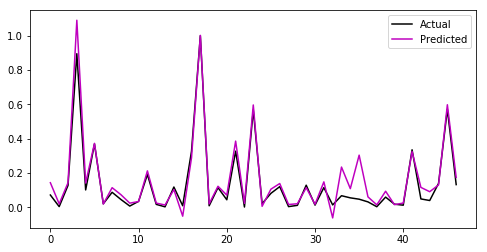


minimum error :  0.06118371857521445


In [19]:
plt.figure(figsize=(8, 4))
plt.plot(y_test, 'black',label = 'Actual')
plt.plot(y_final_pred, 'm', label = 'Predicted')
plt.legend()
plt.show()
print('\nminimum error : ', min_error ) 